<a href="https://colab.research.google.com/github/hasanfarhan33/colabCodes/blob/main/plottingNumberOfVehiclesInIreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("/content/sample_data/vehiclesInIreland.csv")
df.head()

,Statistic Label,Year,Type of Ownership,Engine Capacity cc,Fuel Type,County of Ownership,Year of Registration,UNIT,VALUE
0,Vehicle Population,2015,All owners,All engine capacities,All fuel types,Ireland,All years,Number,1992819.0
1,Vehicle Population,2015,All owners,All engine capacities,All fuel types,Ireland,1999 or before,Number,90989.0
2,Vehicle Population,2015,All owners,All engine capacities,All fuel types,Ireland,2000,Number,77870.0
3,Vehicle Population,2015,All owners,All engine capacities,All fuel types,Ireland,2001,Number,70838.0
4,Vehicle Population,2015,All owners,All engine capacities,All fuel types,Ireland,2002,Number,86226.0


Removing useless columns

In [40]:
df.columns = [c.replace(" ", "_") for c in df.columns]
for col in df.columns:
  print(col)

Statistic_Label
Year
Type_of_Ownership
Engine_Capacity_cc
Fuel_Type
County_of_Ownership
Year_of_Registration
UNIT
VALUE


In [41]:
df = df.drop(columns=["Statistic_Label", "Engine_Capacity_cc"], axis = 1)


In [42]:
df.tail()

,Year,Type_of_Ownership,Fuel_Type,County_of_Ownership,Year_of_Registration,UNIT,VALUE
22395,2021,Male,Other fuel types,Ireland,2018,Number,1664.0
22396,2021,Male,Other fuel types,Ireland,2019,Number,2459.0
22397,2021,Male,Other fuel types,Ireland,2020,Number,2174.0
22398,2021,Male,Other fuel types,Ireland,2021,Number,1763.0
22399,2021,Male,Other fuel types,Ireland,2022,Number,NaN


In [43]:
ownershipTypes = df["Type_of_Ownership"].unique()
counties = df["County_of_Ownership"].unique()
fuelTypes = df["Fuel_Type"].unique()

In [44]:
ownershipTypes

array(['All owners', 'Company', 'Female', 'Male'], dtype=object)

In [45]:
counties

array(['Ireland'], dtype=object)

In [46]:
fuelTypes

array(['All fuel types', 'Petrol', 'Diesel', 'Other fuel types'],
      dtype=object)

In [47]:
df = df.drop(columns = ["UNIT", "Type_of_Ownership", "County_of_Ownership", "Year_of_Registration"])

In [48]:
df.head()

,Year,Fuel_Type,VALUE
0,2015,All fuel types,1992819.0
1,2015,All fuel types,90989.0
2,2015,All fuel types,77870.0
3,2015,All fuel types,70838.0
4,2015,All fuel types,86226.0


In [49]:
df = df[df["Fuel_Type"].str.contains("All fuel types") == False]
df.head()

,Year,Fuel_Type,VALUE
25,2015,Petrol,1134080.0
26,2015,Petrol,82599.0
27,2015,Petrol,71626.0
28,2015,Petrol,63056.0
29,2015,Petrol,73250.0


In [50]:
fuelType = df["Fuel_Type"].unique()

In [51]:
fuelType

array(['Petrol', 'Diesel', 'Other fuel types'], dtype=object)

In [52]:
years = df["Year"].unique()

In [53]:
years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

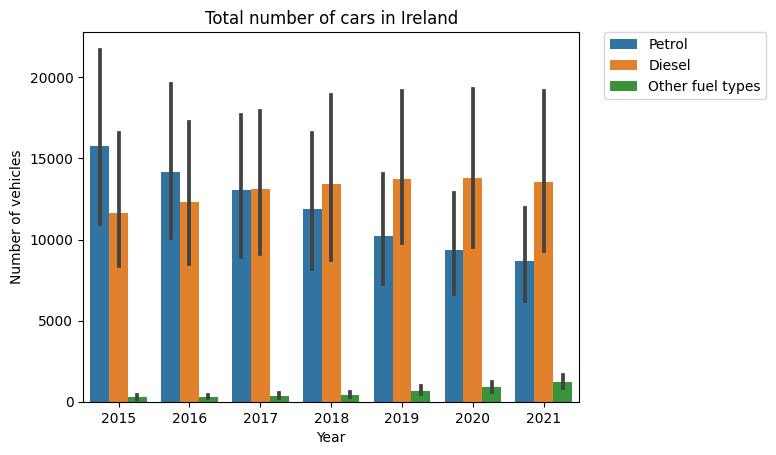

In [57]:
ax = sns.barplot(x='Year', y='VALUE', data=df, hue='Fuel_Type', dodge=True)
plt.title("Total number of cars in Ireland")
# plt.xticks(rotation=90)
plt.ylabel("Number of vehicles")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)